In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

- [S&P500 company symbol list from Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies)
- [Company finacial data from Yahoo](https://finance.yahoo.com/quote/MMM/financials?p=MMM)

In [6]:
pre_sale=pd.read_csv('/mnt/external_disk/Code_projects/Stocks/Crawling/Yahoo_financials/Income_Statement/result_csv/final_csv.csv',encoding='utf-8')
pre_sale.head(4)

,0,1,2,3,4,5,6
0,Breakdown,TTM,12/30/2019,12/30/2018,12/30/2017,NaN,MMM
1,Total Revenue,"31,712,000","32,136,000","32,765,000","31,657,000",NaN,MMM
2,Cost of Revenue,"16,542,000","17,136,000","16,682,000","16,001,000",NaN,MMM
3,Gross Profit,"15,170,000","15,000,000","16,083,000","15,656,000",NaN,MMM


In [10]:
total_revenue=pre_sale[pre_sale['0']=="Total Revenue"][['1','6']]
total_revenue['1']=total_revenue['1'].apply(lambda x:x.replace(",",""))
total_revenue[['1']]=total_revenue[['1']].astype(float)
total_revenue.sort_values(by=['1'],axis=0,inplace=True,ascending=False)
total_revenue

,1,6
14928,548743000.0,WMT
792,321782000.0,AMZN
1398,273857000.0,AAPL
3998,266041000.0,CVS
14263,255639000.0,UNH
...,...,...
5761,855130.0,FRT
100,802857.0,ABMD
11218,792370.0,PAYC
5126,721172.0,ENPH


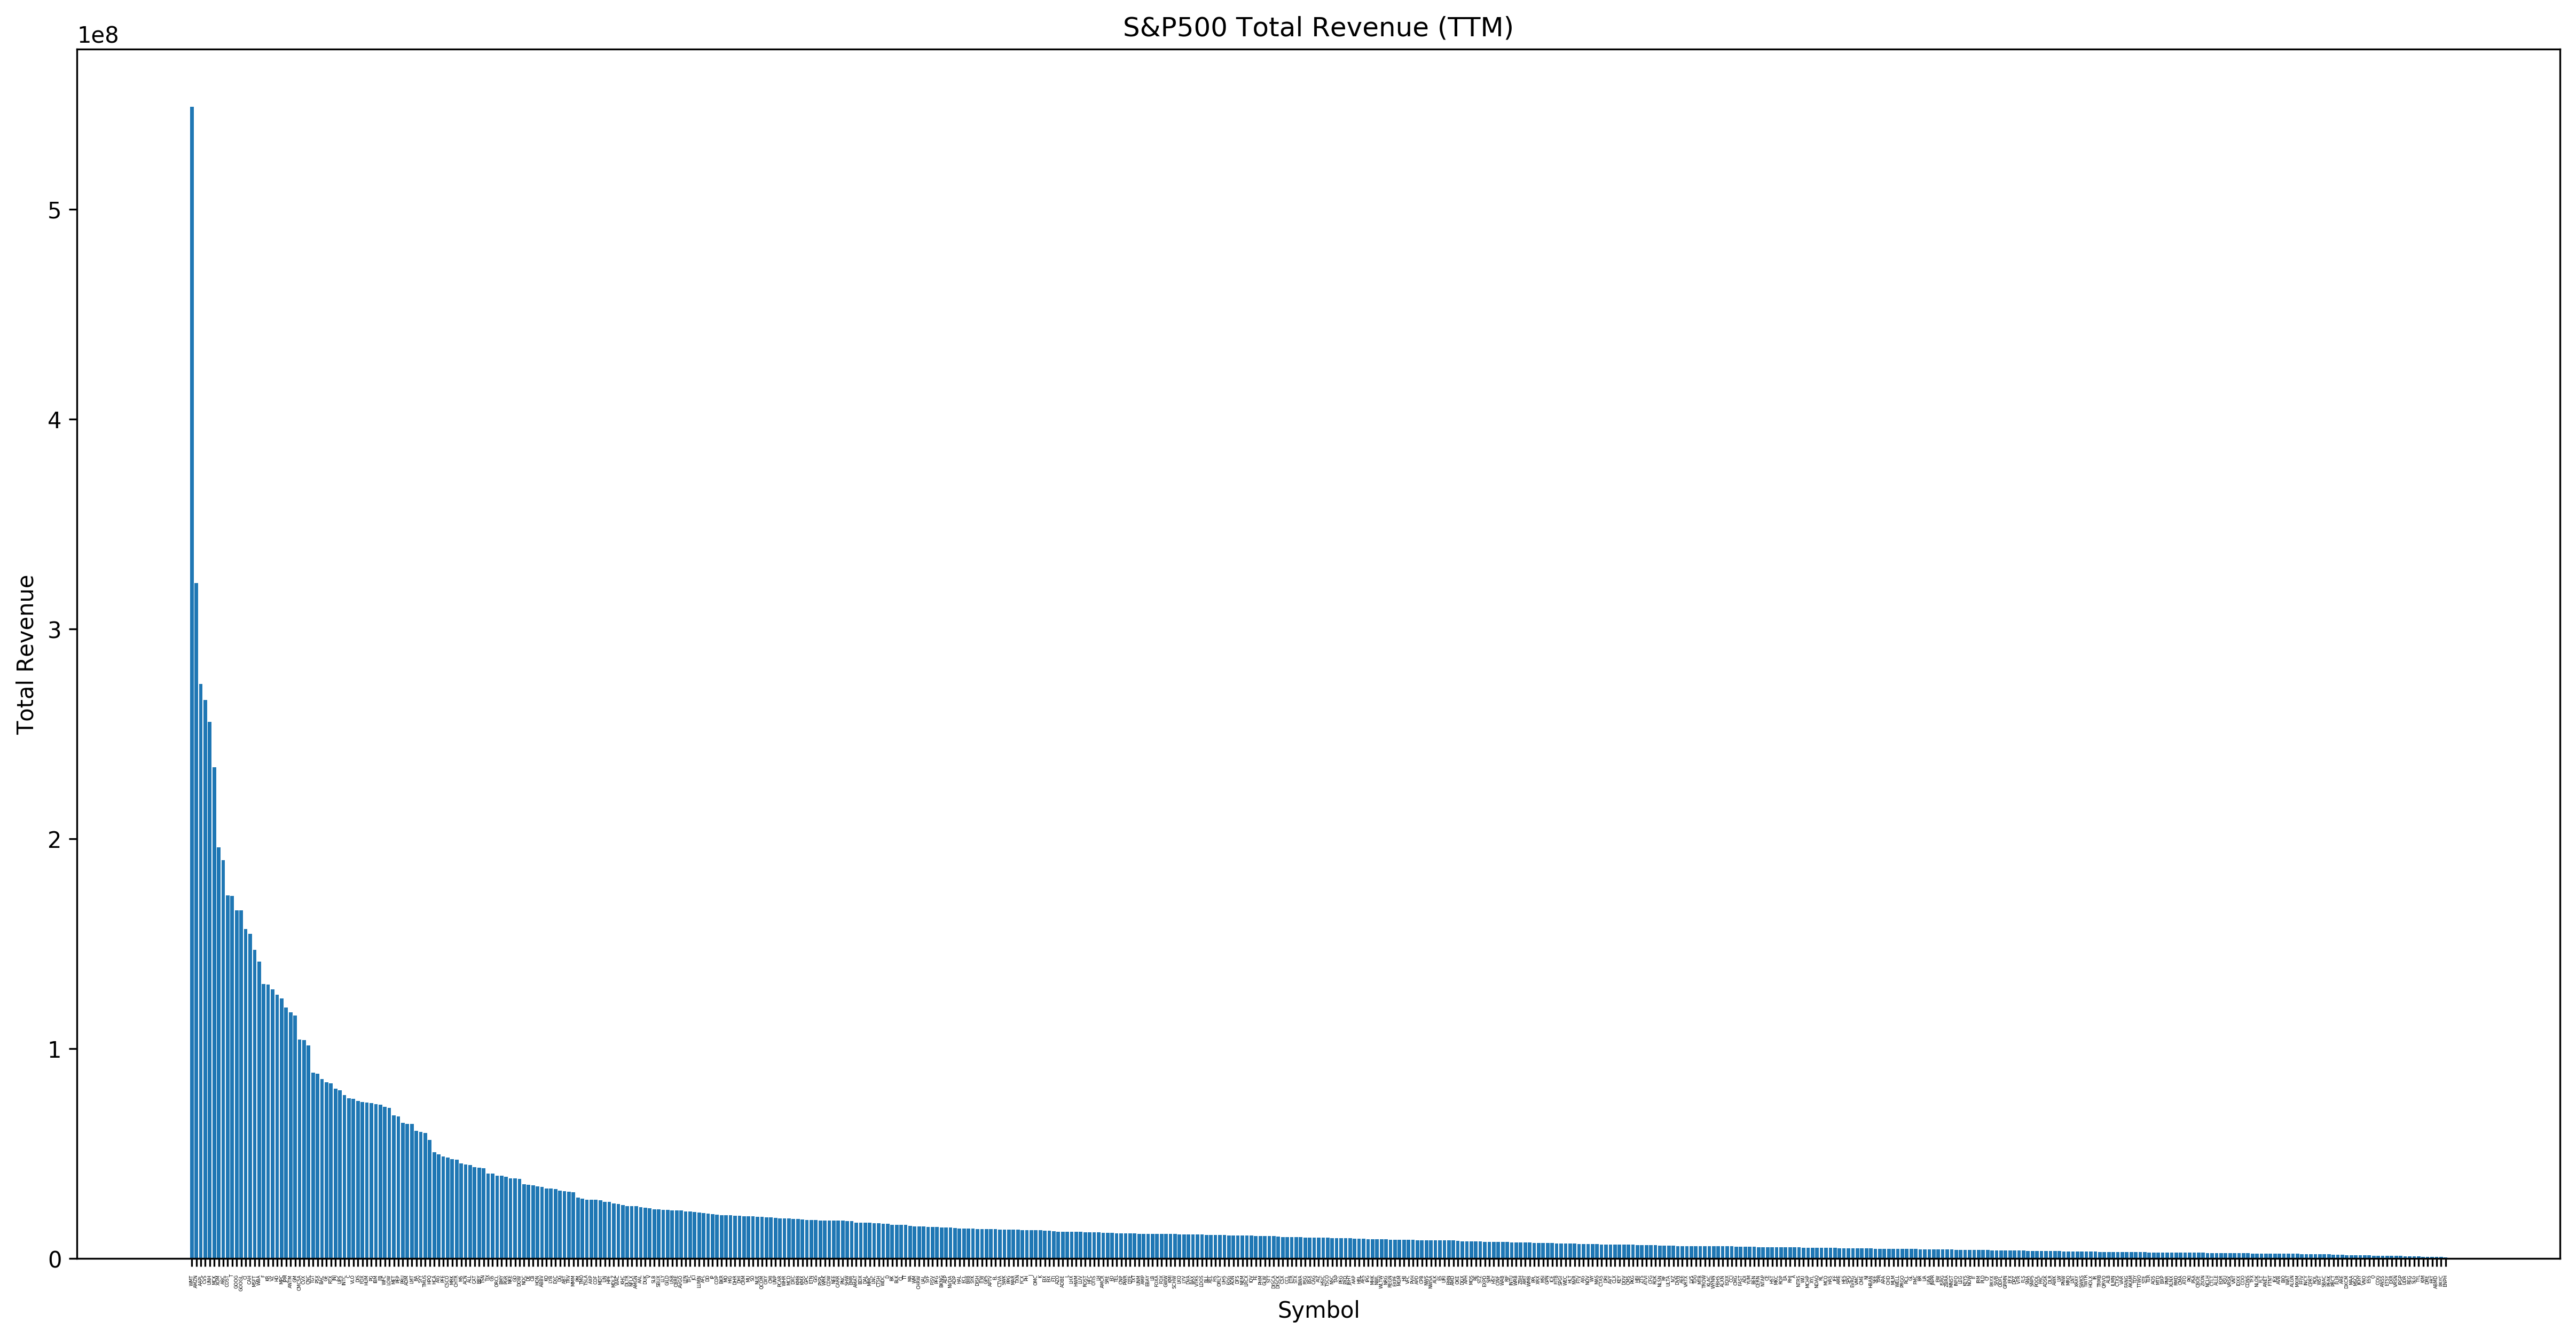

In [11]:
x_data=list(total_revenue['6'])
y_data=list(total_revenue['1'])

fig,ax=plt.subplots(1,1,figsize=(20,10),dpi=300)
ax.bar(x_data,y_data)
ax.set_xticklabels(x_data,rotation=90,fontsize=2)
ax.set_title("S&P500 Total Revenue (TTM)")
ax.set_xlabel('Symbol')
ax.set_ylabel('Total Revenue')
plt.show()
plt.close()

In [42]:
total_revenue=pre_sale[(pre_sale['0']=="Total Revenue")|(pre_sale['0']=="Breakdown")]
# print(total_revenue)
#                    0           1           2           3           4  \
# 0          Breakdown         TTM  12/30/2019  12/30/2018  12/30/2017   
# 1      Total Revenue  31,712,000  32,136,000  32,765,000  31,657,000   
# 33         Breakdown         TTM  12/30/2019  12/30/2018  12/30/2017   
# 34     Total Revenue  32,221,000  31,904,000  30,578,000  27,390,000   
# 66         Breakdown         TTM  12/30/2019  12/30/2018  12/30/2017   
#                 5     6  
# 0             NaN   MMM  
# 1             NaN   MMM  
# 33            NaN   ABT  
# 34            NaN   ABT  
# 66            NaN  ABBV  
# [1007 rows x 7 columns]

slope_list=[]
temp_int=0
unique_symbols=list(total_revenue['6'].unique())
for one_unique_symbol in unique_symbols:
    one_company_total_revenue=total_revenue[total_revenue['6']==one_unique_symbol]
    one_company_total_revenue=one_company_total_revenue.drop_duplicates(keep='last')
#     print(one_company_total_revenue)
#                    0           1           2           3           4    5    6
#     0      Breakdown         TTM  12/30/2019  12/30/2018  12/30/2017  NaN  MMM
#     1  Total Revenue  31,712,000  32,136,000  32,765,000  31,657,000  NaN  MMM
    
    y_data=one_company_total_revenue.iloc[1,1:-2].sort_index(ascending=False)
#     print(y_data)
#     1    31,712,000
#     2    32,136,000
#     3    32,765,000
#     4    31,657,000
#     Name: 1, dtype: object
    
    y_data=y_data.apply(lambda x:float(x.replace(",","")))
#     print(y_data)
#     1    31712000.0
#     2    32136000.0
#     3    32765000.0
#     4    31657000.0
#     Name: 1, dtype: float64

    x_data=np.array(list(range(y_data.shape[0]))).reshape(-1,1)
#     print(x_data)
#     [0, 1, 2, 3]

    model2 = LinearRegression()
    model2.fit(x_data, y_data)

    # ================================================================================
    predicted_value=model2.predict(x_data)
    mean_from_predicted_value=predicted_value.mean()
    
    # ================================================================================
    slope_values=list((predicted_value[-1]-predicted_value[0])/(x_data[-1]-x_data[0]))[0]
#     print(slope_values)

    slope_list.append([one_unique_symbol,slope_values])
print(slope_list[:3])

[['MMM', -46400.0], ['ABT', 1581900.0], ['ABBV', 1803600.0]]


In [46]:
total_revenue_slopes=pd.DataFrame(slope_list,columns=["Symbol","Total Revenue Slope"]).sort_values(by=['Total Revenue Slope'], axis=0)
total_revenue_slopes

,Symbol,Total Revenue Slope
154,DD,-18738100.0
180,XOM,-14765500.0
207,GE,-13602100.0
69,BA,-12244900.0
135,DAL,-11194100.0
...,...,...
22,GOOGL,19056300.0
23,GOOG,19056300.0
129,CVS,30602500.0
102,CI,45147600.0


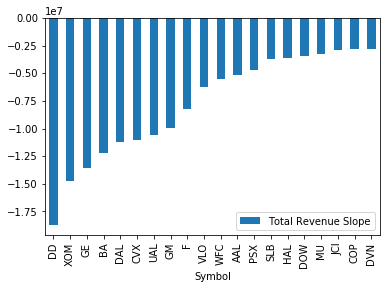

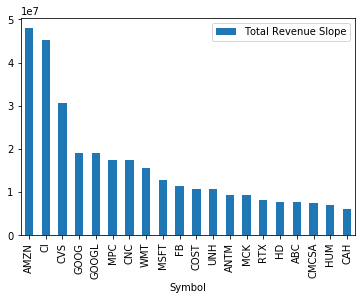

In [52]:
top20_decrease=total_revenue_slopes.head(20)
top20_increase=total_revenue_slopes.tail(20).sort_values(by=['Total Revenue Slope'], axis=0, ascending=False)
top20_decrease.plot(x="Symbol",kind="bar")
top20_increase.plot(x="Symbol",kind="bar")

In [51]:
csv_wikipedia_snp500=pd.read_csv('/mnt/external_disk/Code_projects/Stocks/Crawling/Wikipedia_snp500/result_csv/wikipedia_snp500.csv',encoding='utf-8')
csv_wikipedia_snp500.head(4)

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


In [55]:
merged_top20_decrease=pd.merge(top20_decrease,csv_wikipedia_snp500,on=['Symbol'],how='left')
merged_top20_increase=pd.merge(top20_increase,csv_wikipedia_snp500,on=['Symbol'],how='left')
print(merged_top20_decrease.head(2))
print(merged_top20_increase.head(2))

  Symbol  Total Revenue Slope               Security SEC filings GICS Sector  \
0     DD          -18738100.0  DuPont de Nemours Inc     reports   Materials   
1    XOM          -14765500.0      Exxon Mobil Corp.     reports      Energy   

      GICS Sub-Industry Headquarters Location Date first added      CIK  \
0   Specialty Chemicals  Wilmington, Delaware       2019-04-02  1666700   
1  Integrated Oil & Gas         Irving, Texas       1957-03-04    34088   

  Founded  
0    2017  
1    1999  
  Symbol  Total Revenue Slope         Security SEC filings  \
0   AMZN           47938300.0  Amazon.com Inc.     reports   
1     CI           45147600.0      CIGNA Corp.     reports   

              GICS Sector                   GICS Sub-Industry  \
0  Consumer Discretionary  Internet & Direct Marketing Retail   
1             Health Care                 Managed Health Care   

     Headquarters Location Date first added      CIK Founded  
0      Seattle, Washington       2005-11-18  101872

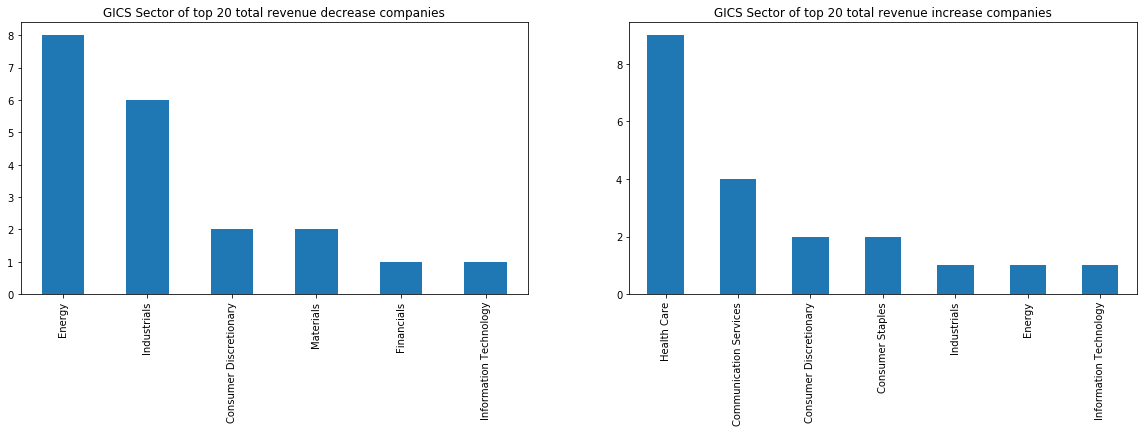

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
merged_top20_decrease['GICS Sector'].value_counts().plot(kind="bar",ax=ax[0],title="GICS Sector of top 20 total revenue decrease companies")
merged_top20_increase['GICS Sector'].value_counts().plot(kind="bar",ax=ax[1],title="GICS Sector of top 20 total revenue increase companies")

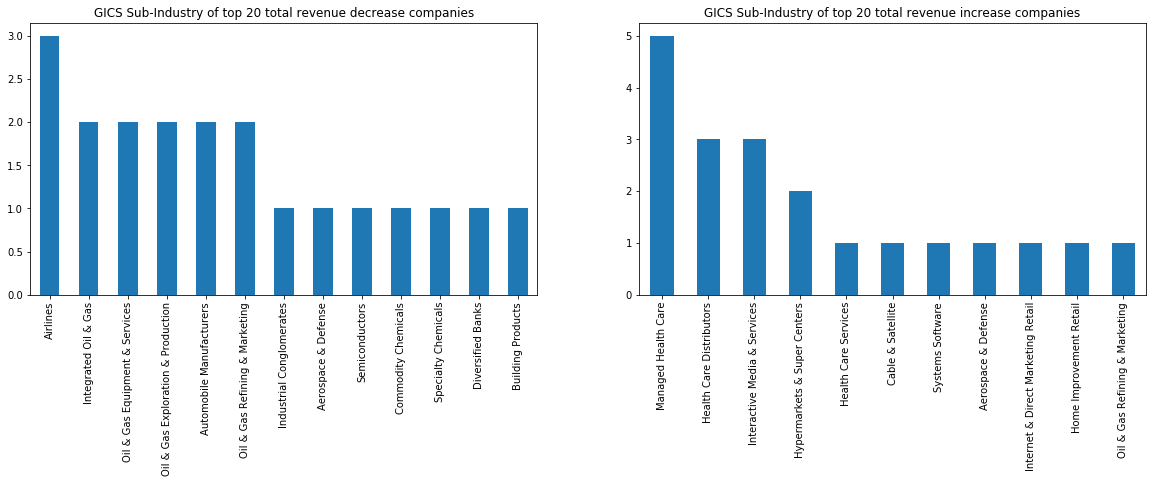

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
merged_top20_decrease['GICS Sub-Industry'].value_counts().plot(kind="bar",ax=ax[0],title="GICS Sub-Industry of top 20 total revenue decrease companies")
merged_top20_increase['GICS Sub-Industry'].value_counts().plot(kind="bar",ax=ax[1],title="GICS Sub-Industry of top 20 total revenue increase companies")